In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
###### Importing Data  #######

df=pd.read_excel('D:/DR/Jupyter Files/Data001.xlsx',header=1)


###### DataFrames and Analysis  #######

df=df[['Inj Qw (bbl/day)','Prod Qo (bbl/day)','Prod Well Block Pressure (psi)']]
df.drop(0,axis=0, inplace=True)
df.drop(133,axis=0, inplace=True)

nn_df1 = pd.to_numeric(df['Inj Qw (bbl/day)'])
nn_df2 = pd.to_numeric(df['Prod Qo (bbl/day)'])
nn_df3 = pd.to_numeric(df['Prod Well Block Pressure (psi)'])
nn_df = pd.concat([nn_df1, nn_df2, nn_df3], axis=1)

#sns.heatmap(nn_df.corr(),annot=False,cmap='RdBu',vmin=0)

In [24]:
####### Data Processing ########

X=nn_df.drop('Prod Qo (bbl/day)',axis=1).values
y=nn_df['Prod Qo (bbl/day)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) ##Creation of training and test tests

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)    ## Scaling training set
X_test = scaler.transform(X_test)          ## Scaling test set

####### Creating NN Layers  #######

import tensorflow.keras.backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(3, activation='relu')) ## Rectified Linear Unit(RELU) chosen as activation function
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1))

model.compile(optimizer = Adam(lr=0.5), loss='mse') ## Adam optimization used instead of Gradiant Descend

####### Fitting of Neural Network to training data  ########

model.fit(x=X_train,y=y_train, validation_data=(X_test,y_test),batch_size=30,epochs=500,verbose=0) ## Test data(y_test) used to validate results and compare losses

<AxesSubplot:>

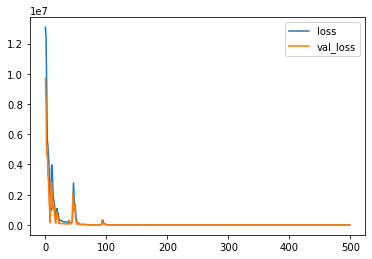

In [25]:
####### Change in loss with epoch  ########

losses = pd.DataFrame(model.history.history)
losses.plot()

In [26]:
####### Testing of Neural Network  #######

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = model.predict(X_test)

In [29]:
mean_absolute_error(y_test,predictions) # Around 77 units deviation from expected flow rate

77.47342224121094

In [30]:
explained_variance_score(y_test,predictions) # EVS score close to 1 indicates high accuracy

0.9999948618819738